# Electric Vehicle Competitive Landscape Analysis: Data Wrangling

The purpose of this notebook is to clean the [dataset](https://catalog.data.gov/dataset/electric-vehicle-population-data) from the Washington State Department of Licensing which contains all the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that have been registered through April 19, 2024 (as of the time this dataset was downloaded).

The primary question we want to answer in this part of the project is: **What are the top 5 best-selling brands in Washington State?**

The reason we want to identify the top 5 best-selling brands is for us to  do a comparative analysis between the pure BEV models that each of these brands currently offers, and then determine which ones provide the best value for consumers based on key metrics such as price, range, and performance.

Later on, we will also want to create a simple machine learning model to **predict what the MSRP price of each vehicle should be**, and then contrast that with the actual MSRP values to determine which models are overpriced compared to the market.

With all this in mind, we will begin by inspecting the dataset and only keep the columns that are relevant to us:

---

## Load Modules & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ev_data = pd.read_csv('Data Files/Electric_Vehicle_Population_Data.csv')
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


#### Description for Each Column:

1. **VIN**: The Vehicle Identification Number.
2. **County**: The county where the vehicle is registered in Washington State.
3. **City**: The city where the vehicle is registered in Washington State.
4. **State**: The state where the vehicle is registered (which is Washington for all the vehicles in this dataset).
5. **Postal Code**: The postal code of the registration address for the vehicle.
6. **Model Year**: The year in which the vehicle was manufactured.
7. **Make**: The manufacturer or brand of the vehicle.
8. **Model**: The specific model or name of the vehicle.
9. **Electric Vehicle Type**: Indicates whether the vehicle is a Battery Electric Vehicle (BEV), which runs solely on electricity, or a Plug-in Hybrid Electric Vehicle (PHEV), which can run both on either electricity or on gas.
10. **Clean Alternative Fuel Vehicle**: Indicates if the vehicle meets the eligibility criteria for Clean Alternative Fuel Vehicle incentives or benefits.
11. **Electric Range**: The distance the vehicle can travel on electric power alone, measured in miles.
12. **Base MSRP**: The Manufacturer's Suggested Retail Price.
13. **Legislative District**: The legislative district associated with the vehicle's registered address.
14. **DOL Vehicle ID**: A unique identifier assigned by the Washington State Department of Licensing (DOL) for each registered vehicle.
15. **Vehicle Location**: The precise location of the vehicle, which could be the address or coordinates.
16. **Electric Utility**: The name of the electric utility company associated with the vehicle, if applicable.
17. **2020 Census Tract**: The census tract associated with the vehicle's registered address, based on the 2020 Census data.

---

## Data Wrangling for EDA Section

Based on the questions we are interested in answering, there are a lot of columns here that we don't need. We only need to keep the: **Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle, Electric Range, and Base MSRP**.

In [3]:
# Keep only the relevant columns
ev_data_filtered = ev_data[['Model Year', 'Make', 'Model', 'Electric Vehicle Type',
                            'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                            'Electric Range', 'Base MSRP']]

# Display the first few rows to verify
ev_data_filtered

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0
1,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0
2,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0
3,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0
4,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0
...,...,...,...,...,...,...,...
181453,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
181454,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0
181455,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
181456,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0


Based on just a quick look of the dataframe, we can see there seems to be missing data for the Base MSRP of each vehicle and Electric range for some.

We will count how many rows contain '0' for each of those two columns:

In [4]:
zero_counts = {
    'Electric Range': (ev_data_filtered['Electric Range'] == 0).sum(),
    'Base MSRP': (ev_data_filtered['Base MSRP'] == 0).sum()
}

zero_counts

{'Electric Range': 94730, 'Base MSRP': 178146}

This shows that about half of the rows have missing data for the Electric Range and almost all of the rows have missing data for the Base MSRP. We will have to separately research these missing values since they are crucial for our analysis, but we can do that later on once we have identified the top 5 best-selling brands.

Let's first take a look at how many different car brands we have in total:

In [5]:
unique_brands = ev_data_filtered['Make'].nunique()
unique_brands

40

In [6]:
# List all unique car brands in the dataset
car_brands = ev_data_filtered['Make'].unique()
sorted(car_brands)

['ALFA ROMEO',
 'AUDI',
 'AZURE DYNAMICS',
 'BENTLEY',
 'BMW',
 'CADILLAC',
 'CHEVROLET',
 'CHRYSLER',
 'DODGE',
 'FIAT',
 'FISKER',
 'FORD',
 'GENESIS',
 'GMC',
 'HONDA',
 'HYUNDAI',
 'JAGUAR',
 'JEEP',
 'KIA',
 'LAND ROVER',
 'LEXUS',
 'LINCOLN',
 'LUCID',
 'MAZDA',
 'MERCEDES-BENZ',
 'MINI',
 'MITSUBISHI',
 'NISSAN',
 'POLESTAR',
 'PORSCHE',
 'RIVIAN',
 'ROLLS ROYCE',
 'SMART',
 'SUBARU',
 'TESLA',
 'TH!NK',
 'TOYOTA',
 'VOLKSWAGEN',
 'VOLVO',
 'WHEEGO ELECTRIC CARS']

Now we want to narrow down to only the top 5 best-selling brands:

In [7]:
top_5_makers = ev_data_filtered['Make'].value_counts().head()
top_5_makers

TESLA        80819
NISSAN       14037
CHEVROLET    13864
FORD          9527
BMW           7680
Name: Make, dtype: int64

In [8]:
# Filter the dataset to only include vehicles from the top 5 automakers
ev_data_top_5 = ev_data_filtered[ev_data_filtered['Make'].isin(top_5_makers.index)]
ev_data_top_5

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
2,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0
4,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0
6,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0
7,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0
9,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0
...,...,...,...,...,...,...,...
181445,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
181449,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0
181455,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
181456,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0


Now let's take a look at how these top 5 brands have grown their BEV sales over the years:

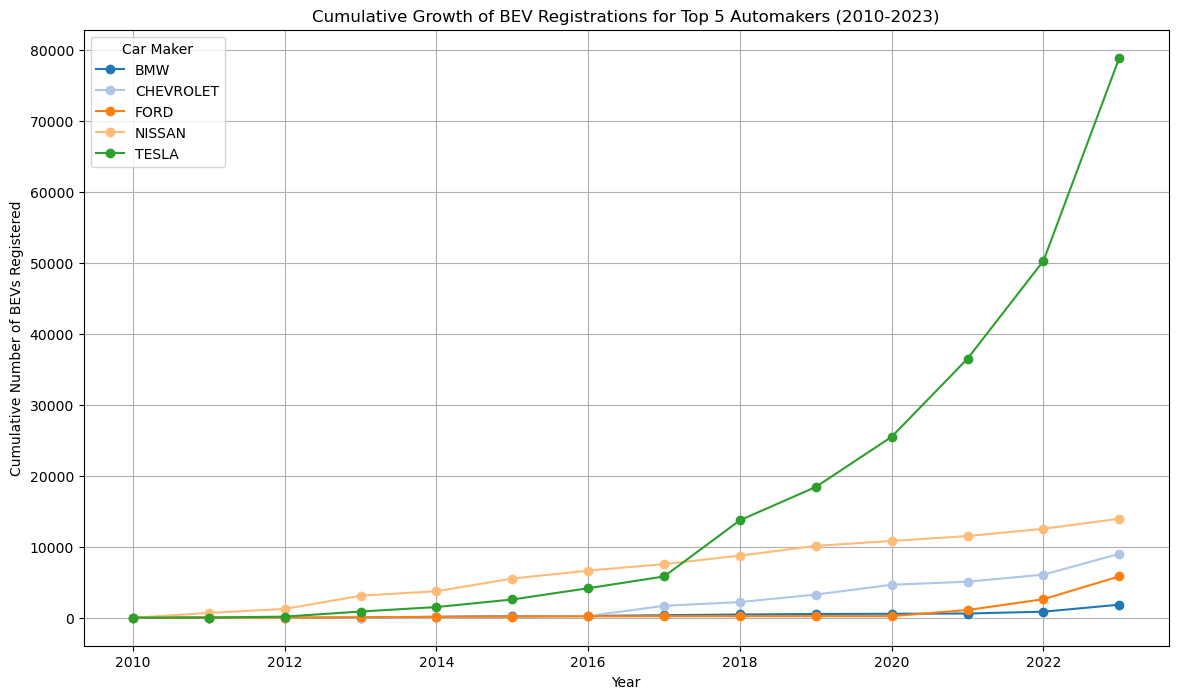

In [9]:
# Filter data for only BEVs
ev_data_top_5_BEV = ev_data_top_5[ev_data_top_5['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

# Filter data to include registrations only from 2010 to 2023
filtered_data_2010_2023 = ev_data_top_5_BEV[ev_data_top_5_BEV['Model Year'].between(2010, 2023)]

# Calculate the count of BEVs per year for the top 5 automakers and their cumulative sum
BEV_counts_filtered = filtered_data_2010_2023.pivot_table(index='Model Year', columns='Make', aggfunc='size', fill_value=0)
BEV_cumulative_counts_filtered = BEV_counts_filtered.cumsum()

# Plot the cumulative growth of BEVs (2010-2023)
colors = plt.get_cmap('tab20').colors
plt.figure(figsize=(14, 8))
for idx, column in enumerate(BEV_cumulative_counts_filtered.columns):
    plt.plot(BEV_cumulative_counts_filtered.index, BEV_cumulative_counts_filtered[column], marker='o', label=column, color=colors[idx % len(colors)])

plt.title('Cumulative Growth of BEV Registrations for Top 5 Automakers (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of BEVs Registered')
plt.legend(title='Car Maker')
plt.grid(True)
plt.show()

**Some interesting things to note:**

1. Nissan was the leader in BEV registrations from at least 2011 up until 2017.
2. At which point Tesla began to grow their sales exponentially (as the result of introducing the Model 3 and then Model Y to the market). 
3. Other brands have grown their sales mostly linearly.
4. BMW and Ford were late entrants into the market, only starting to generate some real traction after 2021.

**Next questions to consider:**

1. Who is best positioned to continue growing their sales over the coming decade?
2. Who is worst positioned to continue growing their sales over the coming decade?

To answer the two questions from above, we first need to collect data on the most up-to-date BEV lineups each car brand currently offers, and then compare prices against key metrics such as range and performance. 

Essentially, we want to find out how much "bang for your buck" each model provides, which will then be used as an indicator for which models will most likely be the best sellers going forward. 


---

## EV Ranking Data

Below is a dataset which contains the **price, tax credit (if applicable), range, and acceleration** information for 36 EV models from the top 5 best-selling brands in Washington State. It also includes a ranking system which assigns points to each model based on how much **"bang for the buck"** they provide. 


In [10]:
ev_ranking_data = pd.read_csv('Data Files/EV_Rankings_w_Tax_Credit.csv')
ev_ranking_data

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
0,Tesla,Model 3 Base,Sedan,"$38,990",$0,"$38,990",272,5.8,6.98,2.26,4.71
1,Tesla,Model 3 Long Range,Sedan,"$47,740",$0,"$47,740",341,4.2,7.14,2.01,5.14
2,Tesla,Model 3 Performance,Sedan,"$53,990","$7,500","$46,490",296,2.9,6.37,1.35,5.02
3,Tesla,Model Y RWD,Crossover SUV,"$44,990","$7,500","$37,490",320,6.5,8.54,2.44,6.10
4,Tesla,Model Y AWD,Crossover SUV,"$47,990","$7,500","$40,490",310,4.8,7.66,1.94,5.71
5,Tesla,Model Y Performance,Crossover SUV,"$51,490","$7,500","$43,990",279,3.5,6.34,1.54,4.80
6,Tesla,Model S AWD,Luxury Sedan,"$72,990",$0,"$72,990",402,3.1,5.51,2.26,3.24
7,Tesla,Model S Plaid,Luxury Sedan,"$87,990",$0,"$87,990",359,2.0,4.08,1.75,2.33
8,Tesla,Model X AWD,Luxury SUV,"$77,990","$7,500","$70,490",335,3.8,4.75,2.68,2.07
9,Tesla,Model X Plaid,Luxury SUV,"$92,990",$0,"$92,990",326,2.5,3.51,2.32,1.18


*This data was collected on May 4th, 2024. 

### How the Ranking System Works:

- First, all the relevant data is collected and placed into the first 8 columns:

1. **Make**: The brand of the vehicle.
2. **Model**: The specific model or name of the vehicle.
3. **Type**: Indicates the vehicle type (Sedan, Crossover SUV, Hatchback, Luxury Sedan, Etc).
4. **MSRP**: The Manufacturer's Suggested Retail Price.
5. **EV_Tax_Credit**: Whether a vehicle is eligible for a tax credit – if it is, the amount is shown.
6. **Purchase_Price**: MSRP minus the tax credit (if applicable).
7. **Range_(mi)**: The distance the vehicle can travel on electric power, measured in miles.
8. **0-60mph**: The time it takes to accelerate from 0-60mph, measured in seconds.

- Then, the data is used to calculate scores for the final 3 columns based on the following relationships:

9. **Range/Price**: The range in miles divided by the purchase price, multiplied by a scaling factor of 1,000.

    (Higher values are better. Essentially, it measures how far you can travel per dollar spent). 
&NewLine;

10. **0-60mph*Price**: The acceleration multiplied by the purchase price, divided by a scaling factor of 100,000.

     (Lower values are better. Essentially, it measures the quickness of the acceleration times dollar spent).
   &NewLine;
 
11. **Bang/Buck_Score**: The difference between the "Range/Price" and "0-60mph*Price" scores.

    (Higher values are better. This is the overall score of how much **"bang for your buck"** a vehicle provides).

The reason why the scaling factors were applied is so that each score could be within the same order of magnitude in order to calculate the overall score, and so that the ranking scale could also be in a familiar range (most values fall between 0-5).

### Lessons Learned From Collecting the Data Above:

- EV prices are subject to change, and whenever they do, the respective scores will also get affected. This dataset is only accurate as of May 4th, 2024, and any other dates where the prices and specs for each EV model remained the same. This data is meant to represent only a snapshot of the market at this given point in time.
- As time goes on, the scores for each EV model will also likely change. However, as long as the data gets updated, the formula for the ranking system remains the same.
- Some brands, (such as Tesla, BMW, and Ford), make it easy to find information on range and performance for each model on their websites, while other brands, (such as Chevrolet and Nissan), make it difficult to find the relevant information.
- On the webpage for the Equinox, for example, Chevy lists out the maximum range on its FWD model and the 0-60mph time of its quickest eAWD model, but won't show both the range and performance specs together for each individual model. From Chevy's website alone, it is impossible to know the 0-60mph time on the long range model, or the range of the quickest model. There is always a trade-off between range and performance, but the way Chevy presents its specs online makes it seem to the consumer like they would be getting the best of both worlds, which is not the case.
- To collect the necessary data for some of Chevy's and Nissan's models, we had to look at other sources such as  MotorTrend reviews which had tested certain trims and had info on the full specifications on range and performance we needed.
- Because of this, several trims of the Chevy Equinox and Blazer were left out since there was incomplete information on both the range and performance for them (at the time this dataset was collected). Hopefully there will be more transparency in the future.

We will explore the EV Ranking Dataset in more detail in the EDA notebook for the next phase of the project, but for now let's continue:

---

## Data Wrangling for Modeling Section

For the modeling notebook, our target variable will be the MSRP value, while our target features will be the vehicle type, range, and performance.

This means that we can keep only the following columns in our dataset:

In [11]:
ev_data_model = ev_ranking_data[['Make', 'Model', 'Type', 'MSRP', 'Range_(mi)', '0-60mph']]
ev_data_model

,Make,Model,Type,MSRP,Range_(mi),0-60mph
0,Tesla,Model 3 Base,Sedan,"$38,990",272,5.8
1,Tesla,Model 3 Long Range,Sedan,"$47,740",341,4.2
2,Tesla,Model 3 Performance,Sedan,"$53,990",296,2.9
3,Tesla,Model Y RWD,Crossover SUV,"$44,990",320,6.5
4,Tesla,Model Y AWD,Crossover SUV,"$47,990",310,4.8
5,Tesla,Model Y Performance,Crossover SUV,"$51,490",279,3.5
6,Tesla,Model S AWD,Luxury Sedan,"$72,990",402,3.1
7,Tesla,Model S Plaid,Luxury Sedan,"$87,990",359,2.0
8,Tesla,Model X AWD,Luxury SUV,"$77,990",335,3.8
9,Tesla,Model X Plaid,Luxury SUV,"$92,990",326,2.5


Now that we have the final dataset we will use for the Modeling notebook, we can save it to use later on:

In [12]:
ev_data_model.to_csv('EV_Data_Model.csv', index=False)